In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from orapMethod import *
from ExtendDT import ext_dt

In [12]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [13]:
ccp_classifier = DecisionTreeClassifier(random_state=0)
path = ccp_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_clfs = []
for ccp_alpha in ccp_alphas:
    ccp_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    ccp_clf.fit(X_train, y_train)
    ccp_clfs.append(ccp_clf)

In [14]:
base_dt = ccp_clfs[0]
ORAP_sequence = get_ORAP_sequence(base_dt)
remove_sequence = ORAP_sequence.removed
orap_clfs = []
for prune_list in remove_sequence:
    orap_clf = series_prune(base_dt, prune_list)
    orap_clfs.append(orap_clf)


[10 (d:6)] | Opting ===>
[10] ===> Ready |
[9 (d:6)] | Opting ===>
[9] ===> Ready |
[8 (d:5)] | Opting ===>
[8] ===> Ready |
[7 (d:5)] | Opting ===>
[7] ===> Ready |
[6 (d:4)] | Opting ===>
[6] ===> Ready |
[5 (d:4)] | Opting ===>
[5] ===> Ready |
[20 (d:3)] | Opting ===>
[20] ===> Ready |
[19 (d:3)] | Opting ===>
[19] ===> Ready |
[17 (d:3)] | Opting ===>
[17] ===> Ready |
[16 (d:3)] | Opting ===>
[16] ===> Ready |
[13 (d:3)] | Opting ===>
[13] ===> Ready |
[12 (d:3)] | Opting ===>
[12] ===> Ready |
[4 (d:3)] | Opting ===>
[4] ===> Ready |
[3 (d:3)] | Opting ===>
[3] ===> Ready |
[18 (d:2)] | Opting ===>
[18] ===> Ready |
[15 (d:2)] | Opting ===>
[15] ===> Ready |
[11 (d:2)] | Opting ===>
[11] ===> Ready |
[2 (d:2)] | Opting ===>
[2] ===> Ready |
[14 (d:1)] | Opting ===>
[14] ===> Ready |
[1 (d:1)] | Opting ===>
[1] ===> Ready |
[0 (d:0)] | Opting ===>
[0] ===> Ready |


In [15]:
orap_APD = [ext_dt(clf).get_APD() for clf in orap_clfs]
orap_train_scores = [clf.score(X_train, y_train) for clf in orap_clfs]
orap_test_scores = [clf.score(X_test, y_test) for clf in orap_clfs]

ccp_APD = [ext_dt(clf).get_APD() for clf in ccp_clfs]
ccp_train_scores = [clf.score(X_train, y_train) for clf in ccp_clfs]
ccp_test_scores = [clf.score(X_test, y_test) for clf in ccp_clfs]

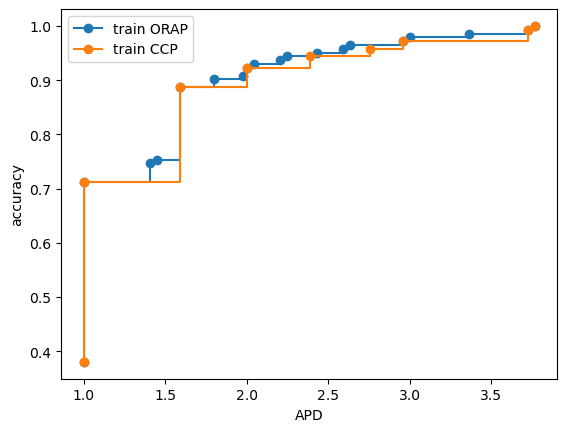

In [17]:
fig, ax = plt.subplots()
ax.set_xlabel("APD")
ax.set_ylabel("accuracy")
ax.plot(orap_APD, orap_train_scores, marker="o", label="train ORAP", drawstyle="steps-pre")
ax.plot(ccp_APD, ccp_train_scores, marker="o", label="train CCP", drawstyle="steps-pre")
_=ax.legend()



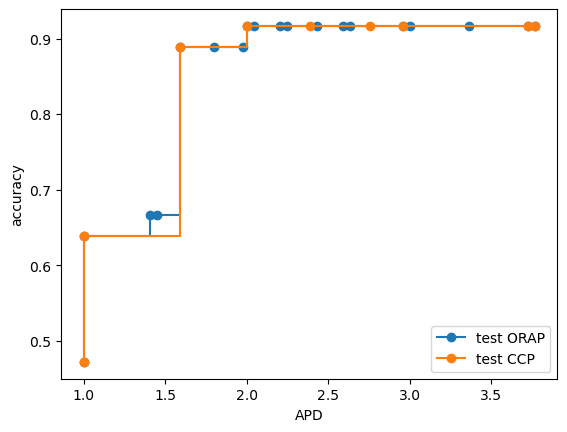

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel("APD")
ax.set_ylabel("accuracy")
ax.plot(orap_APD, orap_test_scores, marker="o", label="test ORAP", drawstyle="steps-pre")
ax.plot(ccp_APD, ccp_test_scores, marker="o", label="test CCP", drawstyle="steps-pre")
_=ax.legend()